# OpenCV - Defect Inspection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Template Matching with Background Subtraction

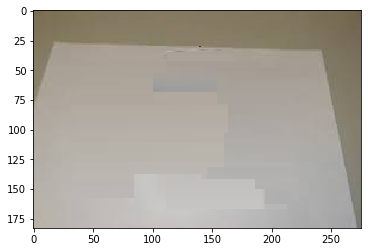

In [3]:
# Background image.
background_image = cv2.cvtColor(cv2.imread('../images/mechanical_back.png'), cv2.COLOR_BGR2RGB)
_ = plt.imshow(background_image)

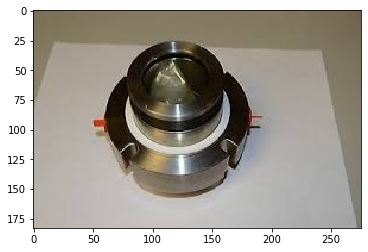

In [4]:
# Normal mechanical parts.
normal_image = cv2.cvtColor(cv2.imread('../images/mechanical_normal.png'), cv2.COLOR_BGR2RGB)
_ = plt.imshow(normal_image)

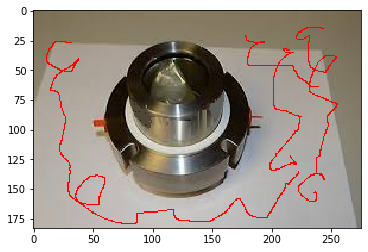

In [5]:
# Defected mechanical parts.
defect_image = cv2.cvtColor(cv2.imread('../images/mechanical_defects.png'), cv2.COLOR_BGR2RGB)
_ = plt.imshow(defect_image)

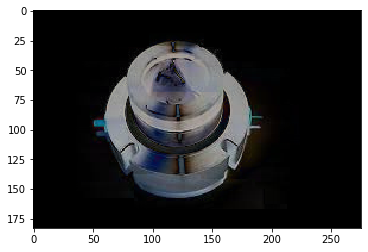

In [6]:
# Difference between normal image and background image in color space.
normal_mask_colored = np.absolute(normal_image.astype(np.int)
                                  - background_image.astype(np.int)).astype(np.uint8)
_ = plt.imshow(normal_mask_colored)

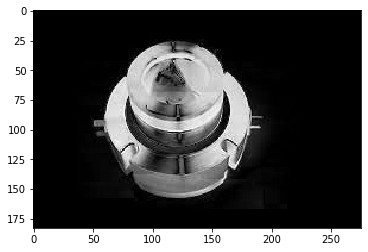

In [7]:
# Difference between normal image and background image in gray-scale image space.
normal_image_grayed = cv2.cvtColor(normal_image, cv2.COLOR_RGB2GRAY)
background_image_grayed = cv2.cvtColor(background_image, cv2.COLOR_RGB2GRAY)

normal_mask_grayed = np.absolute(normal_image_grayed.astype(np.int)
                                 - background_image_grayed.astype(np.int)).astype(np.uint8)
_ = plt.imshow(normal_mask_grayed, cmap='gray')

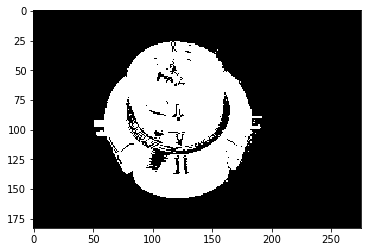

In [8]:
# Binarize.
threshold_value, binarized_mask = cv2.threshold(normal_mask_grayed, 30, 255, cv2.THRESH_BINARY)
_ = plt.imshow(binarized_mask, cmap='gray')

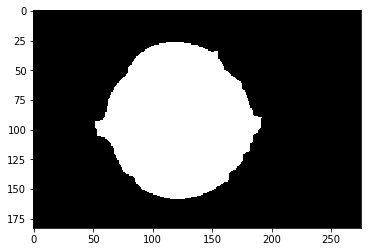

In [9]:
# Fill small gaps by closing operation.
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
closed_mask_image = cv2.morphologyEx(binarized_mask, cv2.MORPH_CLOSE, kernel)
_ = plt.imshow(closed_mask_image, cmap='gray')
foreground_mask = (cv2.cvtColor(closed_mask_image, cv2.COLOR_GRAY2RGB) / 255).astype(np.uint8)

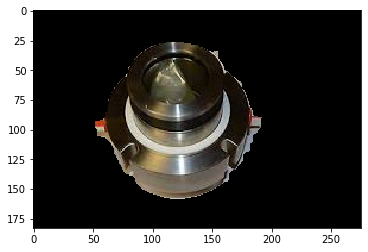

In [10]:
# Normal image with backgound removed.
normal_image_without_background = normal_image * foreground_mask
_ = plt.imshow(normal_image_without_background)

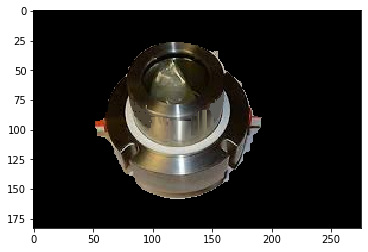

In [11]:
# Defected image with backgound removed.
defect_image_without_background = defect_image * foreground_mask
_ = plt.imshow(defect_image_without_background)

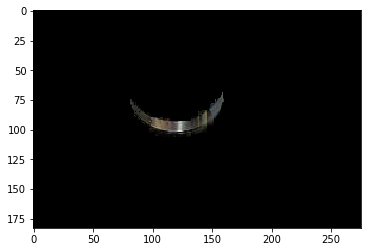

In [12]:
# Difference between normal image and defected image with backgound removed.
diff_normal_defect = np.absolute(normal_image_without_background.astype(np.int)
                                 - defect_image_without_background.astype(np.int)).astype(np.uint8)
_ = plt.imshow(diff_normal_defect)

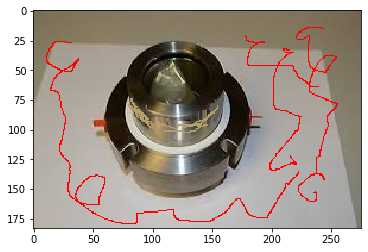

In [13]:
test_image = cv2.cvtColor(cv2.imread('../images/mechanical_test.png'), cv2.COLOR_BGR2RGB)
_ = plt.imshow(test_image)

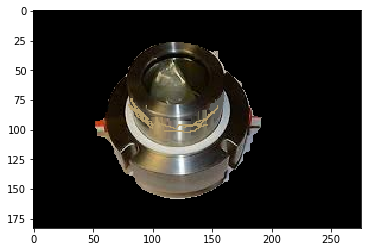

In [14]:
# Test image with backgound removed.
test_image_without_background = test_image * foreground_mask
_ = plt.imshow(test_image_without_background)

In [15]:
# Convert to vector(1st order tensor) of width x height dimension.
normal_vector = normal_image_without_background.reshape(-1).astype(int)
defect_vector = defect_image_without_background.reshape(-1).astype(int)

normal_vector_length = np.linalg.norm(normal_vector)
defect_vector_length = np.linalg.norm(defect_vector)

print('normal_vector_length =', normal_vector_length)
print('defect_vector_length =', defect_vector_length)

# Convert to vector(1st order tensor) of width x height dimension.
test_vector = test_image_without_background.reshape(-1).astype(int)
test_vector_length = np.linalg.norm(test_vector)

normal_matching_score = np.dot(normal_vector, test_vector) / (normal_vector_length * test_vector_length)
defect_matching_score = np.dot(defect_vector, test_vector) / (defect_vector_length * test_vector_length)

print('normal_matching_score =', normal_matching_score)
print('defect_matching_score =', defect_matching_score)

normal_vector_length = 19071.013790567085
defect_vector_length = 19733.11825333239
normal_matching_score = 0.9686397360917512
defect_matching_score = 0.9942169043538518


$$
\begin{aligned}
\mathbf{B} &\quad (\text{background image}) \\
\mathbf{N} &\quad (\text{normal image}) \\
\mathbf{D} &\quad (\text{defected image}) \\
\mathbf{T} &\quad (\text{test image}) \\
\mathbf{M} &= threshold(abs(\mathbf{N} - \mathbf{B})) \ /\  255 &(\text{foreground mask; 1 for foreground and 0 for background}) \\
\mathbf{N}_{masked} &= \mathbf{N} \odot \mathbf{M} &(\text{normal image without background}) \\
\mathbf{D}_{masked} &= \mathbf{D} \odot \mathbf{M} &(\text{defected image without background}) \\
score_{normal} &= { { vec(\mathbf{T}) \cdot vec(\mathbf{N}_{masked}) } \over { |vec(\mathbf{T})| \times |vec(\mathbf{N}_{masked})| } } &(\text{matching score between test image and normal image}) \\
score_{defect} &= { { vec(\mathbf{T}) \cdot vec(\mathbf{D}_{masked}) } \over { |vec(\mathbf{T})| \times |vec(\mathbf{D}_{masked})| } } &(\text{matching score between test image and defect image}) \\ 
\end{aligned}
$$

- 위의 방법은 정상 템플릿과 비정상 템플릿을 여러 개로 등록할 경우에 보다 정확한 비교가 가능합니다.
- 위에서 계산한 matching score는 두 방향 벡터의 cosine 값을 의미하며 -1 ~ 1 범위의 값을 갖습니다.

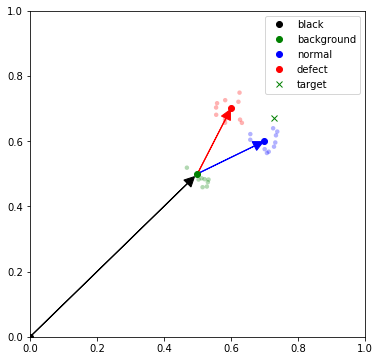

In [27]:
plt.figure(figsize=(6, 6)); plt.xlim([0, 1]); plt.ylim([0, 1]); head = 0.03
black = np.array([[0], [0]]); back = np.array([[0.5], [0.5]]); normal = np.array([[0.7], [0.6]]); defect = np.array([[0.6], [0.7]]); target = np.array([[0.73], [0.67]])
for point, shape, label in zip([black, back, normal, defect, target], ['ko', 'go', 'bo', 'ro', 'gx'], ['black', 'background', 'normal', 'defect', 'target']):
    plt.plot(point[0], point[1], shape, label=label)
plt.arrow(0, 0, back[0,0] - head, back[1,0] - head, head_width=head, head_length=head, fc='k', ec='k')
plt.arrow(back[0,0], back[1,0], normal[0,0] - back[0,0]- head, normal[1,0] - back[1,0] - head / 2, head_width=head, head_length=head, fc='b', ec='b')
plt.arrow(back[0,0], back[1,0], defect[0,0] - back[0,0] - head / 2, defect[1,0] - back[1,0] - head, head_width=head, head_length=head, fc='r', ec='r')
for center, color in zip([back, normal, defect], ['g', 'b', 'r']):
    x, y = np.random.rand(2, 10) / 10 - 0.05 + center; plt.scatter(x, y, c=color, s=20, alpha=0.3, edgecolors='none')
plt.legend(); plt.show()

## Template Matching with Positional Invariance 

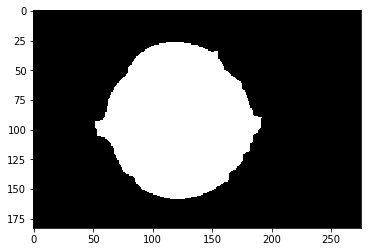

In [17]:
_ = plt.imshow(foreground_mask * 255, cmap='gray')

In [18]:
foreground_binary_mask = cv2.cvtColor(foreground_mask * 255, cv2.COLOR_RGB2GRAY)
_, [contours], hierarchy = cv2.findContours(foreground_binary_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
roi_x, roi_y, roi_w, roi_h = cv2.boundingRect(contours)
print(roi_x, roi_y, roi_w, roi_h)

52 27 141 132


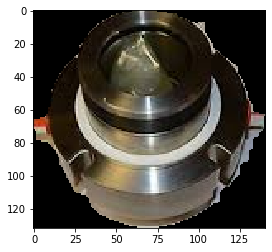

In [19]:
# Normal image template.
normal_image_template = normal_image_without_background[roi_y:roi_y+roi_h, roi_x:roi_x+roi_w]
_ = plt.imshow(normal_image_template)

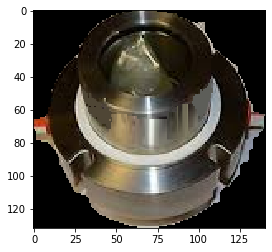

In [20]:
# Defected image template.
defect_image_template = defect_image_without_background[roi_y:roi_y+roi_h, roi_x:roi_x+roi_w]
_ = plt.imshow(defect_image_template)

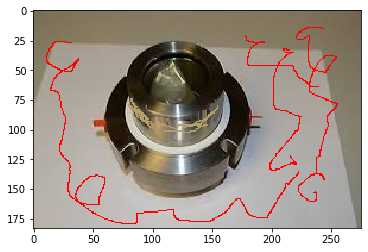

In [21]:
# Test image
_ = plt.imshow(test_image)

In [22]:
# All the 6 methods for comparison in a list
methods = [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED,
           cv2.TM_CCORR, cv2.TM_CCORR_NORMED,
           cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED]
names = ['TM_SQDIFF', 'TM_SQDIFF_NORMED',
         'TM_CCORR', 'TM_CCORR_NORMED',
         'TM_CCOEFF', 'TM_CCOEFF_NORMED']

In [23]:
for method, name in zip(methods, names):
    print('Method =', name)
    value = {}
    for name, template in [('normal', normal_image_template), ('defect', defect_image_template)]:
        print('\t' + name, end=': ')
        temp_image = test_image.copy()
        # Apply template Matching
        result = cv2.matchTemplate(temp_image, template, method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        print('min = {}, max = {}'.format(min_val, max_val))
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            value[name] = min_val
        else:
            value[name] = max_val
    if value['normal'] > value['defect']:
        result = 1
    elif value['normal'] < value['defect']:
        result = 0
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        result = 1 - result
    text = ['Normal!', 'Defected!']
    print('\tResult =', text[result + 1])

Method = TM_SQDIFF
	normal: min = 530384224.0, max = 820458048.0
	defect: min = 510171584.0, max = 800565952.0
	Result = Defected!
Method = TM_SQDIFF_NORMED
	normal: min = 0.9236488938331604, max = 1.0
	defect: min = 0.858639121055603, max = 1.0
	Result = Defected!
Method = TM_CCORR
	normal: min = 283406432.0, max = 450794112.0
	defect: min = 293256960.0, max = 478588608.0
	Result = Defected!
Method = TM_CCORR_NORMED
	normal: min = 0.5173152089118958, max = 0.6696838736534119
	defect: min = 0.5211366415023804, max = 0.6858222484588623
	Result = Defected!
Method = TM_CCOEFF
	normal: min = -39518572.0, max = 48552932.0
	defect: min = -47112828.0, max = 52099440.0
	Result = Defected!
Method = TM_CCOEFF_NORMED
	normal: min = -0.20568419992923737, max = 0.24126870930194855
	defect: min = -0.2414802610874176, max = 0.24977988004684448
	Result = Defected!


## Reference
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html
- https://docs.opencv.org/4.0.1/df/dfb/group__imgproc__object.html